In [1]:
from glob import glob

from PIL import Image
import matplotlib.pyplot as plt

from torchvision import transforms


In [16]:
src = '/data/mpeer/hisfrag20_test/'
src = "/data/mpeer/papyri_1200/croppedImages/"
imgs = list(glob(f'{src}**/*.jpg', recursive=True))
print(len(imgs))


6498


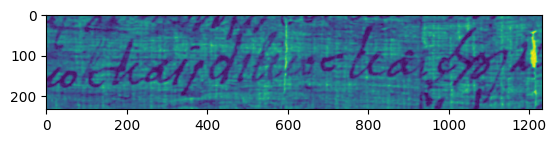

In [17]:
import numpy as np
img = Image.open(imgs[900])
plt.imshow(img)

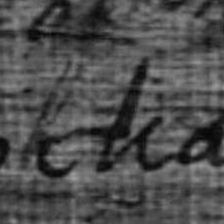

In [5]:
transforms.RandomCrop(224, pad_if_needed=True)(img)

(1232, 234)


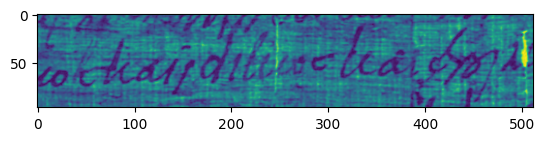

In [22]:
import kornia
import torch
import random

class Erosion:

    def __init__(self, p = 0.5):
        self.p = p

    def __call__(self, tensor):
        if random.random() > self.p:
            return tensor
        return kornia.morphology.erosion(tensor.unsqueeze(0), torch.rand(3,3).round())[0]


class Dilation:

    def __init__(self, p = 0.5):
        self.p = p
        
    def __call__(self, tensor):
        if random.random() > self.p:
            return tensor
        return kornia.morphology.dilation(tensor.unsqueeze(0), torch.rand(3,3).round())[0]


class Resize:

    def __init__(self, size):
        self.max_size = size
    
        
    def __call__(self, img):
        aspect_ratio = img.height / img.width 

        if img.height >= img.width:
            new_height = self.max_size
            new_width = int(self.max_size / aspect_ratio)
        else:
            new_width = 512
            new_height = int(self.max_size * aspect_ratio)

        return img.resize((new_width, new_height), Image.Resampling.LANCZOS)

tf = transforms.Compose([
    Resize(512),
    transforms.CenterCrop((128, 512)),
    transforms.ToTensor(),
    # transforms.Lambda(lambda x : 1 - x)
    Erosion(),
    transforms.ToPILImage()
])
print(img.size)
plt.imshow(tf(img))

In [11]:
shapes = []
for img in imgs:
    shapes.append(np.array(Image.open(img)).shape)

In [25]:
print(np.mean([s[0] for s in shapes]))

278.312865497076
